# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import svm
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve, auc
%matplotlib inline

# Importing Dataset

In [2]:
data = pd.read_csv(r"C:\Users\RUCHITA ANGRE\Desktop\Project msc cs 2\project data.csv")

In [3]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Did you find good quality of product online as compare to your Retailer Shop?,Do you find enough Quantity of grocery product online in comparison to your Retailer ?,Are online products cheaper in price as compared to your Retailer Shop?,"Did you find product online easily ,compare to your Retailer Shop?",Do you find any difficulties in online payment ?,Are you satisfied with the product you received as compared to your Retailer Shop?,"On scale of 5 , can you rate for following factor ? [On Time Delivery]","On scale of 5 , can you rate for following factor ? [Trustworthy]","On scale of 5 , can you rate for following factor ? [No transaction issues]","On scale of 5 , can you rate for following factor ? [Security]","On scale of 5 , can you rate for following factor ? [Product Description]","On scale of 5 , can you rate for following factor ? [Product Reviews]",Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would you prefer shopping grocery online than shopping from your Retailer Shop?,"Overall, How would you rate your Online Grocery Shopping Experience"
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


# Renaming The Columns

In [4]:
data.rename(columns = {'Did you find good quality of product online as compare to your Retailer Shop?':'Quality','Do you find enough  Quantity of grocery product  online in comparison to your Retailer ? ':'Quantity','Are online  products cheaper in price as compared to your Retailer Shop? ':'Cheaper in price', 'Did you find product online easily ,compare to  your Retailer Shop? ':'Found Product Online Easily','Do you find any difficulties in online payment ?':'Difficulties in Online Payments','Are you satisfied with the product  you received as compared to your  Retailer Shop? ':'Satisfaction',
                      'On scale of 5 , can you rate for following factor ? [On Time Delivery]':'On Time Delivery',
                        'On scale of 5 , can you rate for following factor ? [Trustworthy]':'Trustworthy',
       'On scale of 5 , can you rate for following factor ? [No transaction issues]':'No transaction issues',
       'On scale of 5 , can you rate for following factor ? [Security]':'Security',
       'On scale of 5 , can you rate for following factor ? [Product  Description]':'Product  Description',
       'On scale of 5 , can you rate for following factor ? [Product Reviews]':'Product Reviews', 'Overall, How would you rate your Online Grocery Shopping Experience':'Overall Experience','Would you prefer  shopping grocery online  than shopping  from your Retailer Shop?  ':'Would You Prefer'}, inplace = True)


In [5]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,Yes,Yes,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,No,Yes,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,No,No,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,Yes,Yes,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,No,No,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


# Converting object to integer

In [6]:
def trans_con(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0

In [7]:
data['Quality'] = data['Quality'].apply(trans_con)
data['Quantity'] = data['Quantity'].apply(trans_con)

In [8]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,Yes,Yes,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,Yes,Yes,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,No,No,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,Yes,Yes,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,No,No,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [9]:
data['Cheaper in price'] = data['Cheaper in price'].apply(trans_con)
data['Found Product Online Easily'] = data['Found Product Online Easily'].apply(trans_con)

In [10]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,No,Yes,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,1,1,No,No,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,Yes,Yes,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,Yes,Yes,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,1,1,No,Yes,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,0,0,Yes,No,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,No,Yes,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,No,Yes,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,0,0,Yes,No,3,1,1,1,1,1,Yes,Weekly,No,1


In [11]:
data['Difficulties in Online Payments'] = data['Difficulties in Online Payments'].apply(trans_con)
data['Satisfaction'] = data['Satisfaction'].apply(trans_con)

In [12]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,5,5,5,4,Yes,Everyday,Yes,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,Yes,Everyday,Yes,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,2,2,2,2,2,2,Yes,Everyday,Yes,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,5,5,5,5,5,5,Yes,Everyday,Yes,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,Yes,Weekly,Yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,Yes,Weekly,No,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,4,5,3,3,Yes,Weekly,Yes,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,4,4,5,5,5,4,Yes,Weekly,Yes,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,Yes,Weekly,No,1


In [13]:
data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '] = data['Has  COVID-19   increased time you spent online  grocery Shopping    ? '].apply(trans_con)
data[ 'Would You Prefer'] = data[ 'Would You Prefer'].apply(trans_con)

In [14]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,Yes,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,Yes,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,No,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,Yes,All of above,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,No,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


In [15]:
data['If Yes, Do you find Online Grocery Shopping Easier ?'] = data['If Yes, Do you find Online Grocery Shopping Easier ?'].apply(trans_con)

In [16]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,Variety of Product,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,All of above,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,Variety of Product,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,Discount & Offers;Convenient;Shop at any time,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,All of above,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,Variety of Product;Shop at any time,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


# Converting Categorical Data To Integer

In [17]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()

In [18]:
data['Why do you  Shop Online?  '] = number.fit_transform(data['Why do you  Shop Online?  '].astype('str'))

In [19]:
data

,Timestamp,Have you ever shopped Online?,"If Yes, Do you find Online Grocery Shopping Easier ?",Why do you Shop Online?,Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,How often do you shop online in last six month?,Would You Prefer,Overall Experience
0,2021/02/16 6:58:46 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,5,5,5,4,1,Everyday,1,5
1,2021/02/16 6:59:24 pm GMT+5:30,Yes,1,10,1,1,1,1,0,0,1,2,2,2,2,2,1,Everyday,1,1
2,2021/02/16 7:00:12 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,2,2,2,2,2,2,1,Everyday,1,5
3,2021/02/16 7:03:40 pm GMT+5:30,Yes,1,0,1,1,1,1,1,1,5,5,5,5,5,5,1,Everyday,1,5
4,2021/02/16 7:19:36 pm GMT+5:30,Yes,1,10,0,1,1,1,0,1,2,2,1,2,2,1,1,Weekly,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2021/03/16 10:55:40 am GMT+5:30,Yes,0,5,0,0,0,0,1,0,1,1,1,1,3,2,1,Weekly,0,1
366,2021/03/16 5:15:57 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,5,5,4,5,3,3,1,Weekly,1,4
367,2021/03/16 8:51:02 pm GMT+5:30,Yes,1,0,1,1,1,1,0,1,4,4,5,5,5,4,1,Weekly,1,4
368,2021/03/16 9:25:47 pm GMT+5:30,Yes,0,19,0,0,0,0,1,0,3,1,1,1,1,1,1,Weekly,0,1


In [20]:
data.columns

Index(['Timestamp', 'Have you ever shopped Online?',
       'If Yes, Do you find Online Grocery Shopping Easier ?',
       'Why do you  Shop Online?  ', 'Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience'],
      dtype='object')

# Converting Columns Using One Hot Encoding

In [21]:
one_hot_data = pd.get_dummies(data[['If Yes, Do you find Online Grocery Shopping Easier ?','Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience']])

In [22]:
one_hot_data

,"If Yes, Do you find Online Grocery Shopping Easier ?",Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,Would You Prefer,Overall Experience,How often do you shop online in last six month?_2 times a week,How often do you shop online in last six month?_Everyday,How often do you shop online in last six month?_Monthly,How often do you shop online in last six month?_Weekly
0,1,1,1,1,1,0,1,5,5,5,5,5,4,1,1,5,0,1,0,0
1,1,1,1,1,1,0,0,1,2,2,2,2,2,1,1,1,0,1,0,0
2,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,5,0,1,0,0
3,1,1,1,1,1,1,1,5,5,5,5,5,5,1,1,5,0,1,0,0
4,1,0,1,1,1,0,1,2,2,1,2,2,1,1,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0,0,0,0,0,1,0,1,1,1,1,3,2,1,0,1,0,0,0,1
366,1,1,1,1,1,0,1,5,5,4,5,3,3,1,1,4,0,0,0,1
367,1,1,1,1,1,0,1,4,4,5,5,5,4,1,1,4,0,0,0,1
368,0,0,0,0,0,1,0,3,1,1,1,1,1,1,0,1,0,0,0,1


In [23]:
one_hot_data = pd.get_dummies(data[['If Yes, Do you find Online Grocery Shopping Easier ?','Quality', 'Quantity', 'Cheaper in price',
       'Found Product Online Easily', 'Difficulties in Online Payments',
       'Satisfaction', 'On Time Delivery', 'Trustworthy',
       'No transaction issues', 'Security', 'Product  Description',
       'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?', 'Would You Prefer',
       'Overall Experience']],drop_first=True)

In [24]:
one_hot_data

,"If Yes, Do you find Online Grocery Shopping Easier ?",Quality,Quantity,Cheaper in price,Found Product Online Easily,Difficulties in Online Payments,Satisfaction,On Time Delivery,Trustworthy,No transaction issues,Security,Product Description,Product Reviews,Has COVID-19 increased time you spent online grocery Shopping ?,Would You Prefer,Overall Experience,How often do you shop online in last six month?_Everyday,How often do you shop online in last six month?_Monthly,How often do you shop online in last six month?_Weekly
0,1,1,1,1,1,0,1,5,5,5,5,5,4,1,1,5,1,0,0
1,1,1,1,1,1,0,0,1,2,2,2,2,2,1,1,1,1,0,0
2,1,1,1,1,1,1,1,2,2,2,2,2,2,1,1,5,1,0,0
3,1,1,1,1,1,1,1,5,5,5,5,5,5,1,1,5,1,0,0
4,1,0,1,1,1,0,1,2,2,1,2,2,1,1,1,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0,0,0,0,0,1,0,1,1,1,1,3,2,1,0,1,0,0,1
366,1,1,1,1,1,0,1,5,5,4,5,3,3,1,1,4,0,0,1
367,1,1,1,1,1,0,1,4,4,5,5,5,4,1,1,4,0,0,1
368,0,0,0,0,0,1,0,3,1,1,1,1,1,1,0,1,0,0,1


In [25]:
one_hot_data.columns

Index(['If Yes, Do you find Online Grocery Shopping Easier ?', 'Quality',
       'Quantity', 'Cheaper in price', 'Found Product Online Easily',
       'Difficulties in Online Payments', 'Satisfaction', 'On Time Delivery',
       'Trustworthy', 'No transaction issues', 'Security',
       'Product  Description', 'Product Reviews',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'Would You Prefer', 'Overall Experience',
       'How often do you shop online in last six month?_Everyday',
       'How often do you shop online in last six month?_Monthly',
       'How often do you shop online in last six month?_Weekly'],
      dtype='object')

# Prediction based on target variable as 'Satisfaction'


# 1) Decision Tree

# Plotting a variables graphs

<ipython-input-26-000d3e4a6b25>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-26-000d3e4a6b25>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-26-000d3e4a6b25>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will al

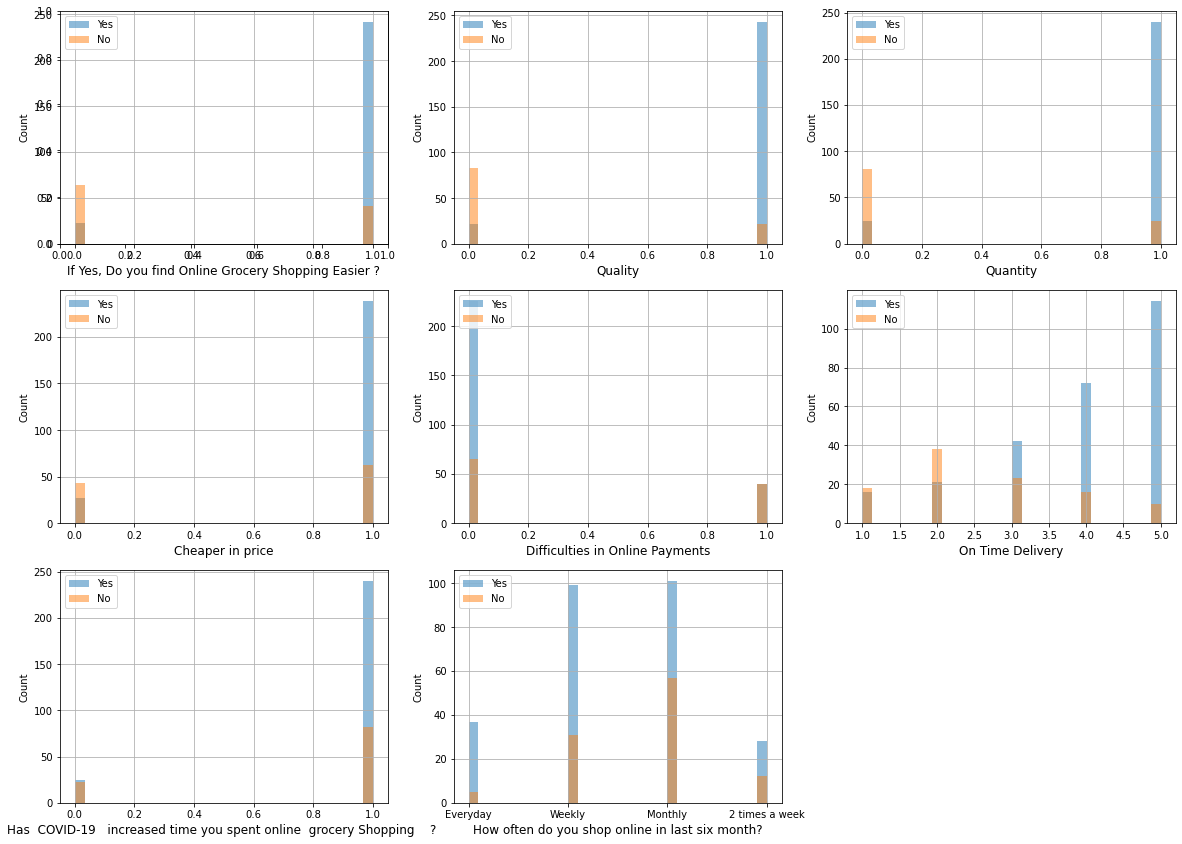

In [26]:
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['If Yes, Do you find Online Grocery Shopping Easier ?', 'Quality','Quantity', 'Cheaper in price',
               'Difficulties in Online Payments','On Time Delivery', 'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
               'How often do you shop online in last six month?','Overall Experience',]
    if colName in features:
        
        pos = data[data['Satisfaction'] == 1][colName]
        neg = data[data['Satisfaction'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName,fontsize=12)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        
        pos.hist(alpha = 0.5, bins=30, label='Yes')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 0.5, bins=30, label='No')
        ax.legend(loc='upper left')
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

In [27]:
train, test = train_test_split(one_hot_data, test_size =0.25)

In [28]:
train.shape

(277, 19)

In [29]:
test.shape

(93, 19)

In [30]:
c1 = DecisionTreeClassifier(min_samples_split=10)

In [31]:
features = ['If Yes, Do you find Online Grocery Shopping Easier ?','Quality', 'Quantity', 'Cheaper in price','Difficulties in Online Payments','On Time Delivery',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
       'How often do you shop online in last six month?_Everyday',
       'How often do you shop online in last six month?_Monthly',
       'How often do you shop online in last six month?_Weekly','Overall Experience'] 

In [32]:
X_train = train[features]
y_train = train['Satisfaction']

X_test = test[features]
y_test = test['Satisfaction']

In [33]:
tree1 = c1.fit(X_train, y_train)

In [34]:
y_pred_t1 = c1.predict(X_train)

In [35]:
y_pred1 = c1.predict(X_test)

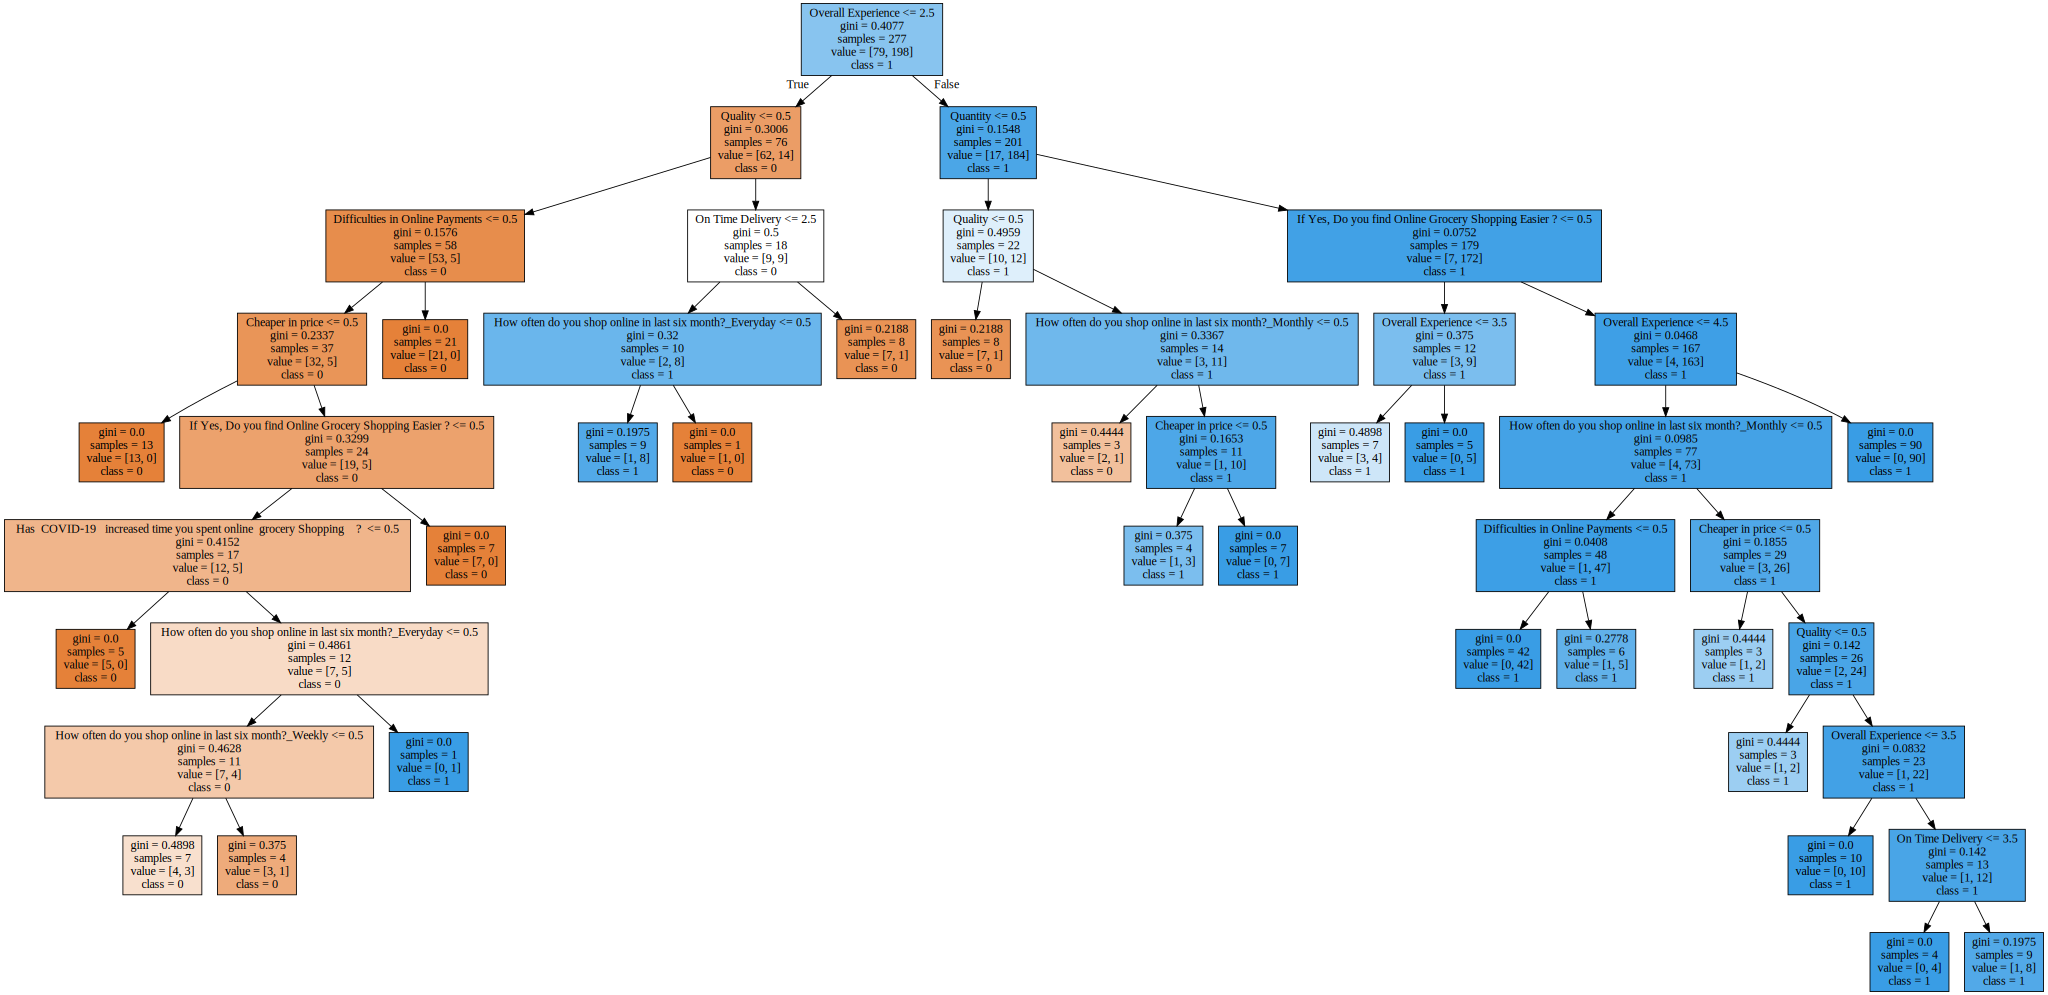

In [36]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [37]:
sat_train_score_1 = accuracy_score(y_train, y_pred_t1)*100


In [38]:
sat_test_score_1 = accuracy_score(y_test, y_pred1)*100
sat_test_score_1

94.6236559139785

In [39]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.94      0.99      0.96        67

    accuracy                           0.95        93
   macro avg       0.95      0.92      0.93        93
weighted avg       0.95      0.95      0.95        93



In [40]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[22,  4],
       [ 1, 66]], dtype=int64)

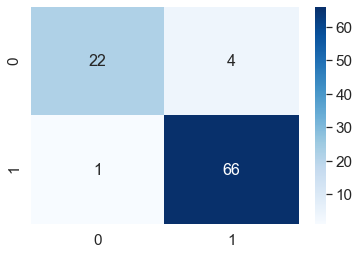

In [41]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [42]:
model1 = tree1.predict_proba(X_train)
model1

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.11111111, 0.88888889],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [43]:
model1_test = tree1.predict_proba(X_test)
model1_test

array([[0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.11111111, 0.88888889],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.11111111, 0.88888889],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [44]:
!pip install scikit-plot

<Figure size 504x504 with 0 Axes>

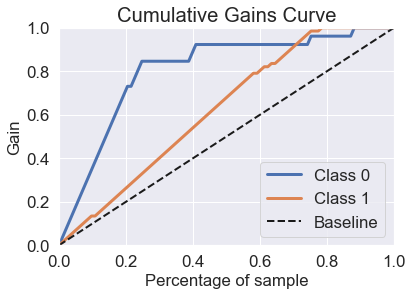

In [45]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model1_test)
plt.show()

# 2) Random Forest

In [46]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [47]:
rf1_model_pred = rf1.predict(X_test)

In [48]:
rf1_model_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1], dtype=int64)

In [49]:
sat_test_score_rf = accuracy_score(y_test, rf1_model_pred)*100
sat_test_score_rf

94.6236559139785

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.94      0.99      0.96        67

    accuracy                           0.95        93
   macro avg       0.95      0.92      0.93        93
weighted avg       0.95      0.95      0.95        93



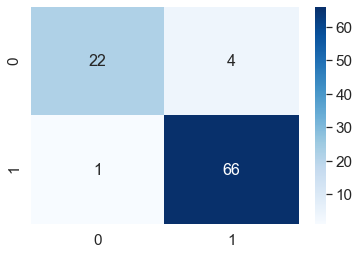

In [50]:
rd = print(classification_report(y_test, rf1_model_pred))
rf_cm = confusion_matrix(y_test, rf1_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') 
plt.show()

# 3) Support Vector Machine

In [51]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [52]:
model_svm = svmf.fit(X_train, y_train)

In [53]:
pred_svm = model_svm.predict(X_test)

In [54]:
sat_test_score_svm = accuracy_score(y_test, pred_svm)*100
sat_test_score_svm

95.6989247311828

# Plotting  accuracy graph  of all  algo

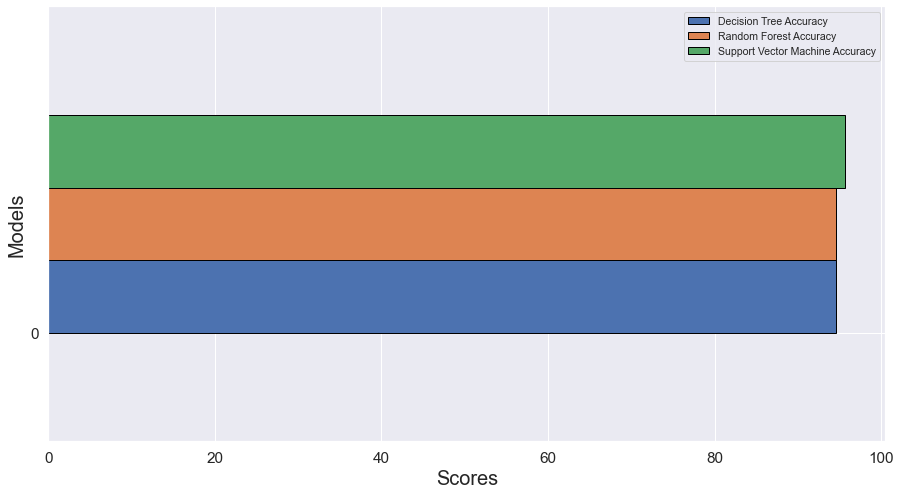

In [55]:
modelacc = pd.DataFrame({"Decision Tree Accuracy ": [sat_test_score_1],
                               "Random Forest Accuracy": [sat_test_score_rf],
                               "Support Vector Machine Accuracy": [sat_test_score_svm]})
modelacc.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Scores', fontsize=20)
plt.ylabel('Models',fontsize=20)
plt.legend(fontsize=10.5);

# Prediction based on target variable as 'would you prefer'

# Plotting a variables graphs

<ipython-input-56-2cb28109bb86>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-56-2cb28109bb86>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(6, 3, c)
<ipython-input-56-2cb28109bb86>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will al

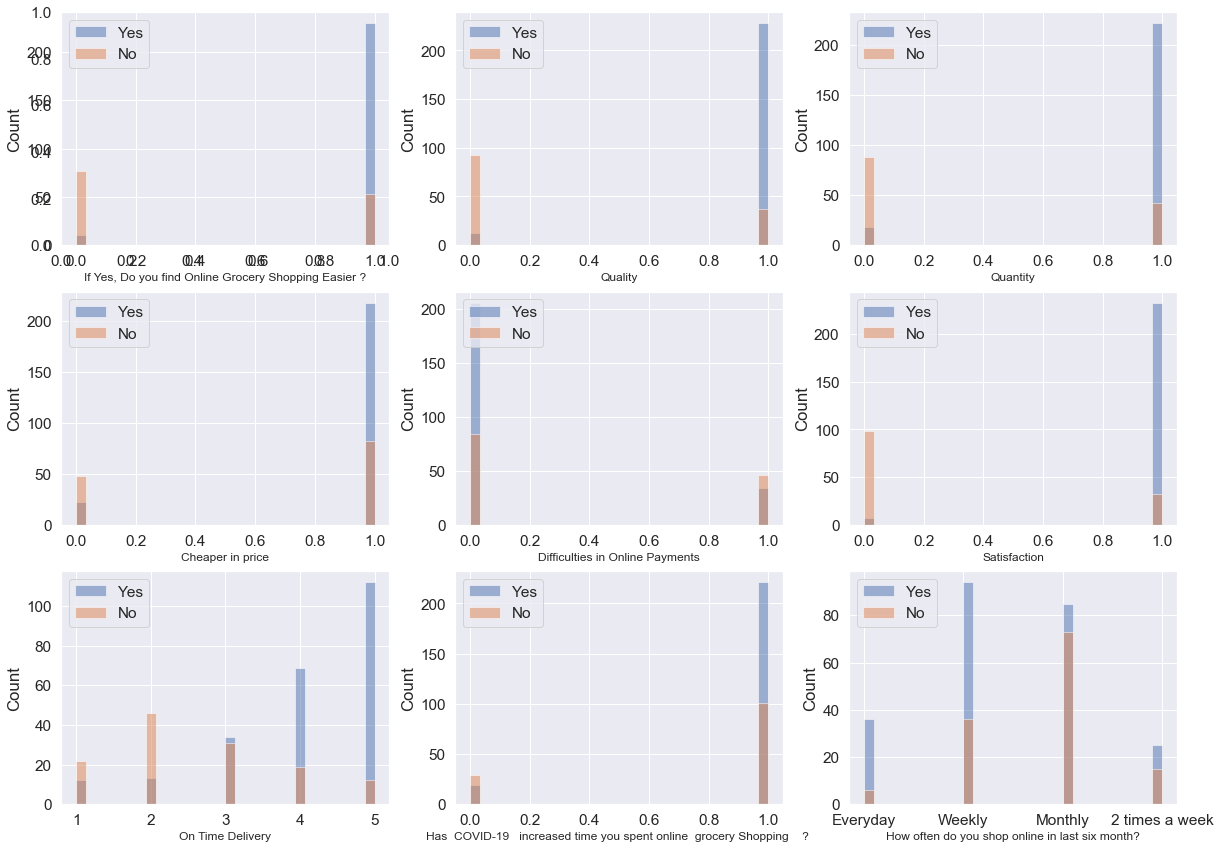

In [56]:
fig, axes = plt.subplots(6, 3, figsize=(20, 30))

c = 1
for idx, (colName, ax)  in enumerate(list(zip(data.columns, axes.flatten()))):
    features = ['If Yes, Do you find Online Grocery Shopping Easier ?', 'Quality','Quantity', 'Cheaper in price',
               'Difficulties in Online Payments','On Time Delivery', 'Has  COVID-19   increased time you spent online  grocery Shopping    ? ',
               'How often do you shop online in last six month?','Satisfaction','Overall Experience']
    if colName in features:
        
        pos = data[data['Would You Prefer'] == 1][colName]
        neg = data[data['Would You Prefer'] == 0][colName]
        
        ax = fig.add_subplot(6, 3, c)
        ax.set_xlabel(colName,fontsize=12)
        ax.set_ylabel('Count')
        ax.set_title="{} Like/Dislike Distribution".format(colName)
        
        
        pos.hist(alpha = 0.5, bins=30, label='Yes')
        
        ax = fig.add_subplot(6, 3, c)
        neg.hist(alpha = 0.5, bins=30, label='No')
        ax.legend(loc='upper left')
        c += 1
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

# 1) Decision Tree

In [57]:
c2 = DecisionTreeClassifier(min_samples_split=10)

In [58]:
features = ['Quality', 'Quantity', 'Cheaper in price', 'Satisfaction',
       'Has  COVID-19   increased time you spent online  grocery Shopping    ? ','Overall Experience',
       'How often do you shop online in last six month?_Everyday',
       'How often do you shop online in last six month?_Monthly',
       'How often do you shop online in last six month?_Weekly'] 

In [59]:
X_train = train[features]
y_train = train['Would You Prefer']

X_test = test[features]
y_test = test['Would You Prefer']

In [60]:
tree1 = c2.fit(X_train, y_train)

In [61]:
y_pred_t1 = c2.predict(X_train)

In [62]:
y_pred1 = c2.predict(X_test)

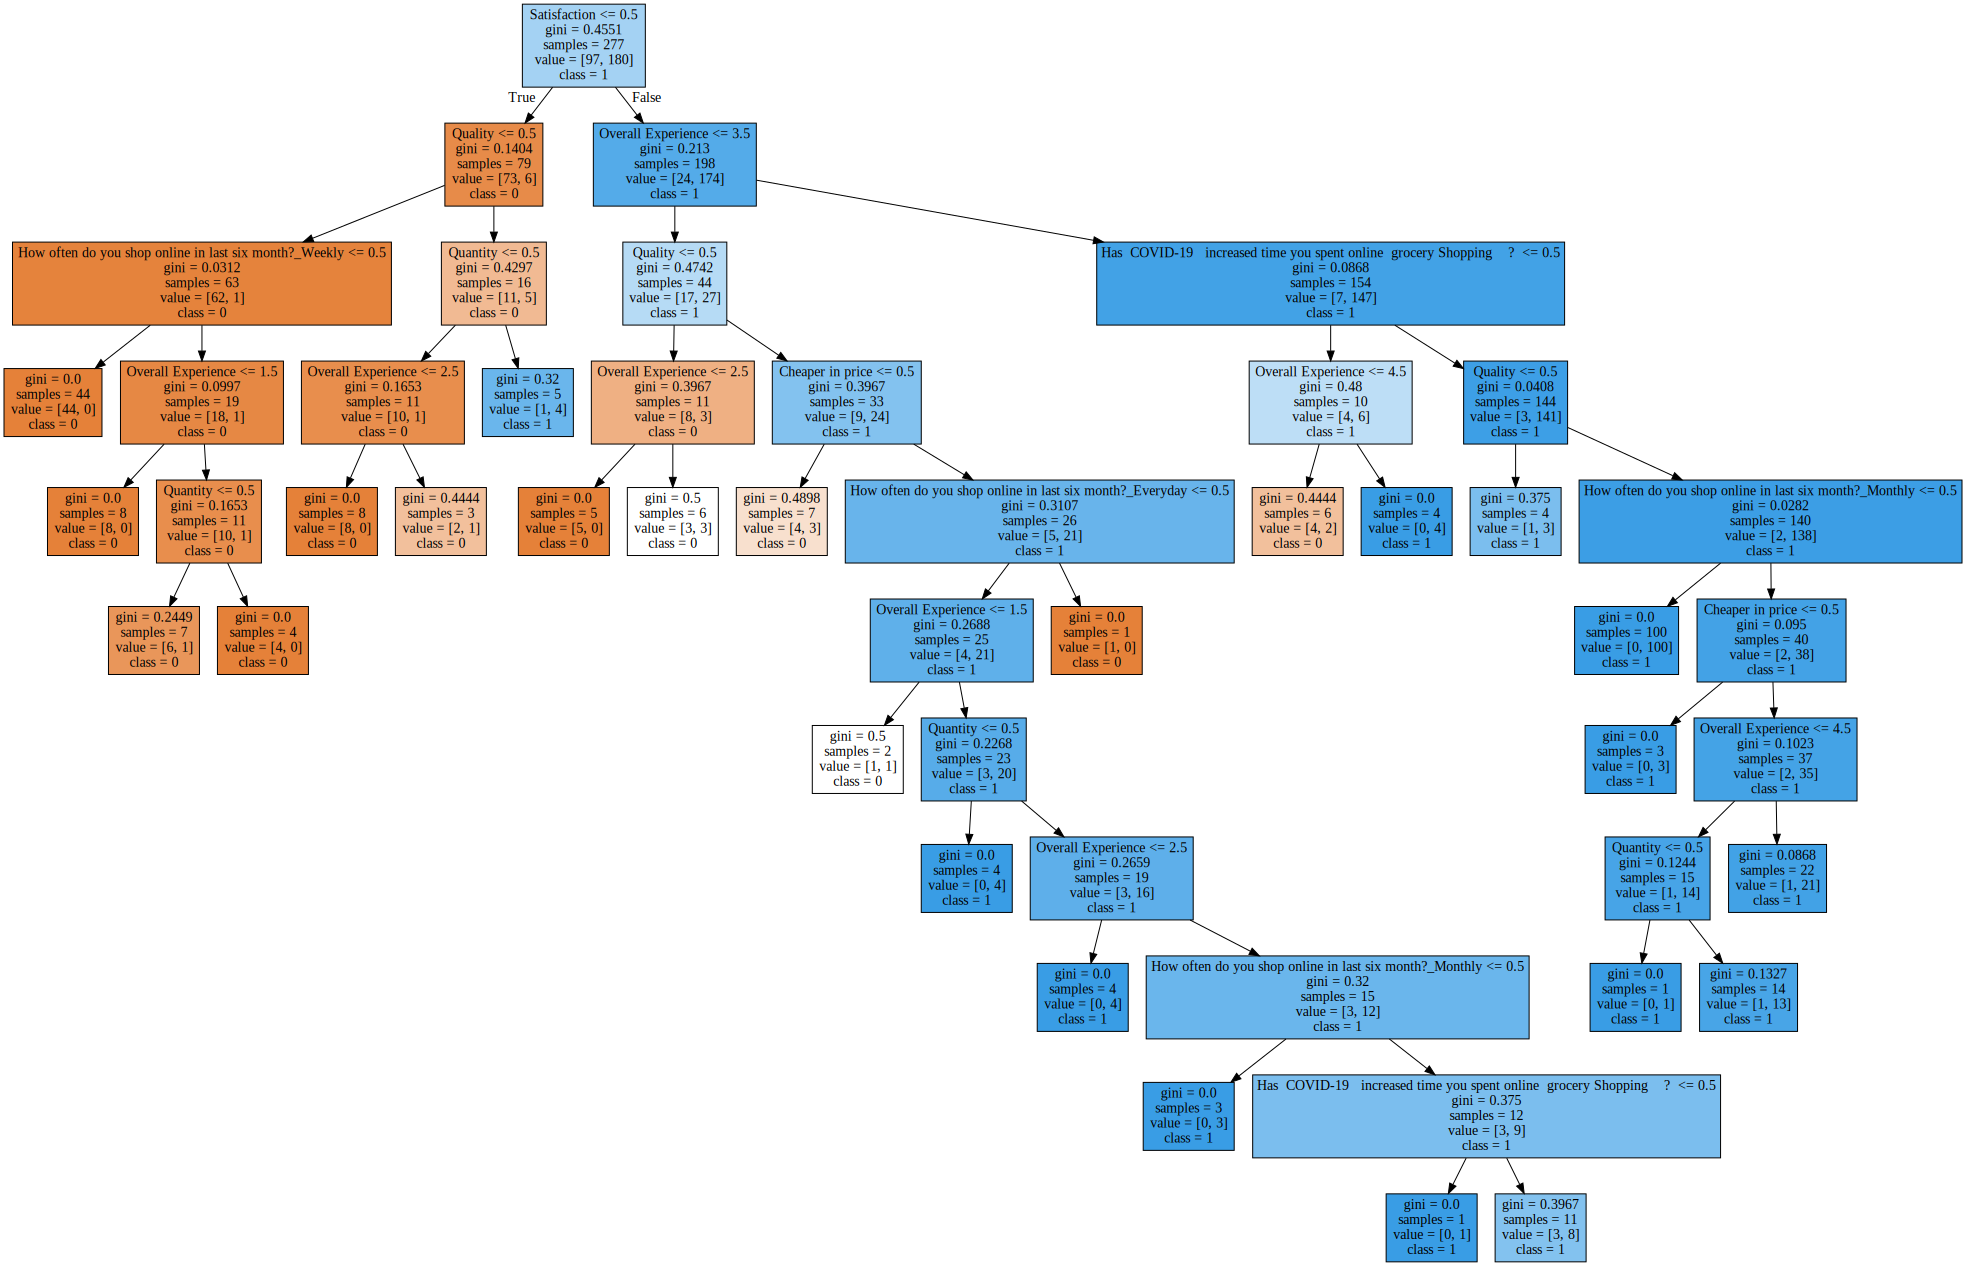

In [63]:
dot_data = tree.export_graphviz(tree1,feature_names = X_train.columns,class_names=["0","1"], filled=True, precision=4)
graph = graphviz.Source(dot_data, format="png") 
graph

In [64]:
wyp_train_score_1 = accuracy_score(y_train, y_pred_t1)*100


In [65]:
wyp_test_score_1 = accuracy_score(y_test, y_pred1)*100
wyp_test_score_1

87.09677419354838

In [66]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        33
           1       0.90      0.90      0.90        60

    accuracy                           0.87        93
   macro avg       0.86      0.86      0.86        93
weighted avg       0.87      0.87      0.87        93



In [67]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[27,  6],
       [ 6, 54]], dtype=int64)

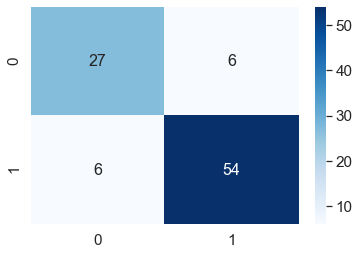

In [68]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g')
plt.show()

In [69]:
model2 = tree1.predict_proba(X_train)
model2

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.07142857, 0.92857143],
       [0.27272727, 0.72727273],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04545455, 0.95454545],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.04545455, 0.95454545],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.27272727, 0.72727273],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.07142857, 0.92857143],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.04545455, 0.95454545],
       [0.27272727, 0.72727273],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.

In [70]:
model2_test = tree1.predict_proba(X_test)
model2_test

array([[0.07142857, 0.92857143],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.04545455, 0.95454545],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.27272727, 0.72727273],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.

<Figure size 504x504 with 0 Axes>

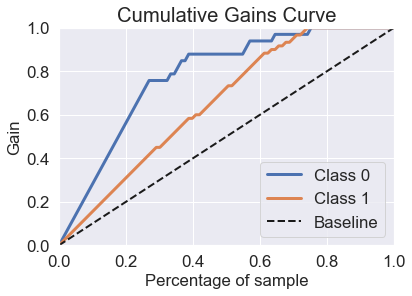

In [71]:
import scikitplot as skplt
plt.figure(figsize=(7,7))
skplt.metrics.plot_cumulative_gain(y_test, model2_test)
plt.show()

# 2) Random Forest

In [72]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=20)

In [73]:
rf1_model_pred_1 = rf1.predict(X_test)

In [74]:
wyp_test_score_rf = accuracy_score(y_test, rf1_model_pred_1)*100
wyp_test_score_rf

90.32258064516128

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.89      0.97      0.93        60

    accuracy                           0.90        93
   macro avg       0.91      0.88      0.89        93
weighted avg       0.91      0.90      0.90        93



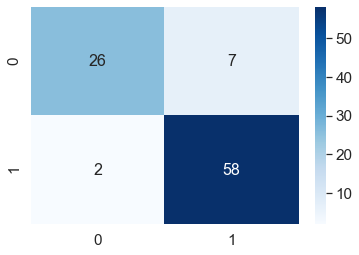

In [75]:
print(classification_report(y_test, rf1_model_pred_1))
rf_cm = confusion_matrix(y_test, rf1_model_pred_1)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

# 3) Support Vector Machine

In [83]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [84]:
model_svm = svmf.fit(X_train, y_train)

In [85]:
pred_svm = model_svm.predict(X_test)

In [86]:
wyp_test_score_svm = accuracy_score(y_test, pred_svm)*100
wyp_test_score_svm

89.24731182795699

# Plotting  accuracy graph of tried algo

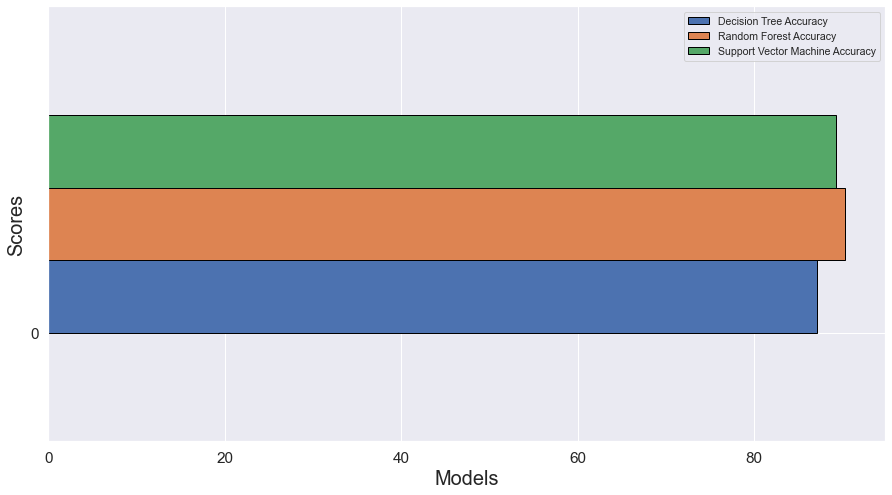

In [87]:
modelacc1 = pd.DataFrame({"Decision Tree Accuracy ": [wyp_test_score_1],
                               "Random Forest Accuracy": [wyp_test_score_rf],
                               "Support Vector Machine Accuracy": [wyp_test_score_svm]})
modelacc1.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);


# Plotting  AUC-ROC 

In [88]:
fpr1, tpr1, threshold1 = roc_curve(y_train, model1[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_train, model2[:,1])
roc_auc2 = auc(fpr2, tpr2)



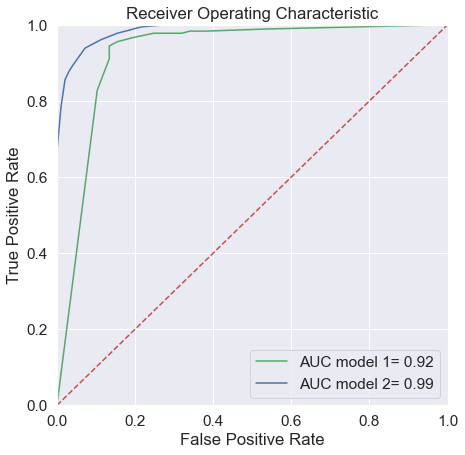

In [89]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [90]:
fpr1, tpr1, threshold1 = roc_curve(y_test, model1_test[:,1])
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, model2_test[:,1])
roc_auc2 = auc(fpr2, tpr2)

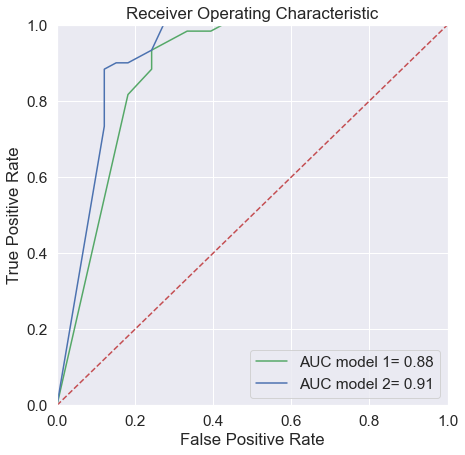

In [91]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Accuracy of both the prediction based on Random forest

Text(0.5, 1.0, 'Prediction of  Variables baesd on Random Forest')

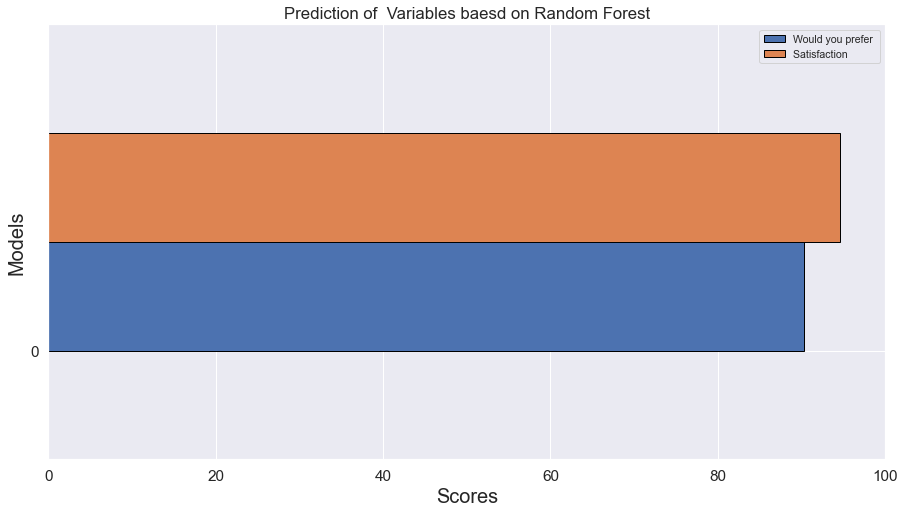

In [92]:
modelacc2 = pd.DataFrame({"Would you prefer ":[wyp_test_score_rf],
                          "Satisfaction ": [sat_test_score_rf]})
modelacc2.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlim(0,100)
plt.ylabel('Models', fontsize=20)
plt.xlabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);
plt.title('Prediction of  Variables baesd on Random Forest')